https://machinelearningmastery.com/machine-learning-in-python-step-by-step/

# Prep

In [35]:
# Check the versions of libraries
 
# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))
# seaborn
import seaborn
print('seaborn: {}'.format(seaborn.__version__))

Python: 3.5.2 (default, Nov 23 2017, 16:37:01) 
[GCC 5.4.0 20160609]
scipy: 1.1.0
numpy: 1.15.0
matplotlib: 2.2.2
pandas: 0.23.4
sklearn: 0.19.2
seaborn: 0.9.0


In [36]:
# Load libraries

# Basics
import numpy as np
import pandas

# Visuals
from pandas.plotting import scatter_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.manifold import TSNE

# Data prep
from sklearn.preprocessing import StandardScaler

# Metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Cross validation
from sklearn import model_selection

In [37]:
# Load dataset
# url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
url = "~/dev/rtc/data/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pandas.read_csv(url, names=names)

In [39]:
# shape
print(dataset.shape)

(150, 5)


In [40]:
# head
print(dataset.head(20))

    sepal-length  sepal-width  petal-length  petal-width        class
0            5.1          3.5           1.4          0.2  Iris-setosa
1            4.9          3.0           1.4          0.2  Iris-setosa
2            4.7          3.2           1.3          0.2  Iris-setosa
3            4.6          3.1           1.5          0.2  Iris-setosa
4            5.0          3.6           1.4          0.2  Iris-setosa
5            5.4          3.9           1.7          0.4  Iris-setosa
6            4.6          3.4           1.4          0.3  Iris-setosa
7            5.0          3.4           1.5          0.2  Iris-setosa
8            4.4          2.9           1.4          0.2  Iris-setosa
9            4.9          3.1           1.5          0.1  Iris-setosa
10           5.4          3.7           1.5          0.2  Iris-setosa
11           4.8          3.4           1.6          0.2  Iris-setosa
12           4.8          3.0           1.4          0.1  Iris-setosa
13           4.3    

In [41]:
# Separate features and labels
array = dataset.values
X = np.array( array[:,0:4].astype('float') )
y = np.array( array[:,4] )

In [9]:
# Split-out validation dataset
validation_size = 0.20
seed = np.random.RandomState(7)
X_train, X_validation, y_train, y_validation = model_selection.train_test_split(X, y, test_size=validation_size, random_state=seed)

In [10]:
# Convert labels to ints and back

ints_by_labels = {
    'Iris-setosa' : 0,
    'Iris-versicolor' : 1,
    'Iris-virginica': 2,
}

labels_by_ints = { v : k for k, v in ints_by_labels.items() }

def label2int(label):
    return ints_by_labels[label]

def int2label(int_of_label):
    return labels_by_ints[int_of_label]

y_plot = [ label2int(label) for label in y ]
y_train_plot = [ label2int(label) for label in y_train ]
y_validation_plot = [ label2int(label) for label in y_validation ]
print(y_plot[:10])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


# Explore

In [44]:
# descriptions
print(dataset.describe())

       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [12]:
# class distribution
print(dataset.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


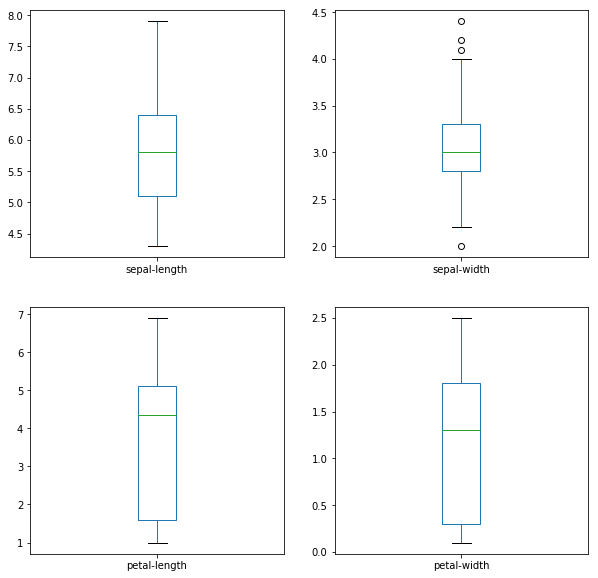

In [13]:
# percentiles
# box and whisker plots: box -- Q2, Q3; belt -- median (between Q1,2 and 3,4); whiskers -- at 1.5|Q3 - Q2| from median
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False, figsize=(10,10))
plt.show()

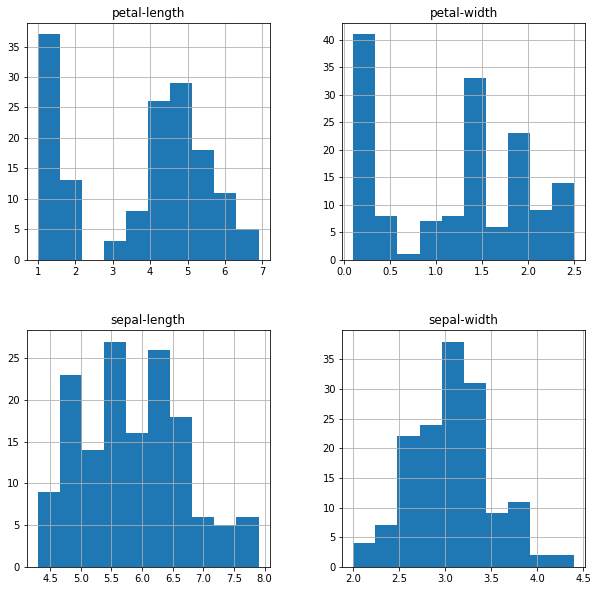

In [14]:
# histograms
dataset.hist(figsize=(10,10))
plt.show()

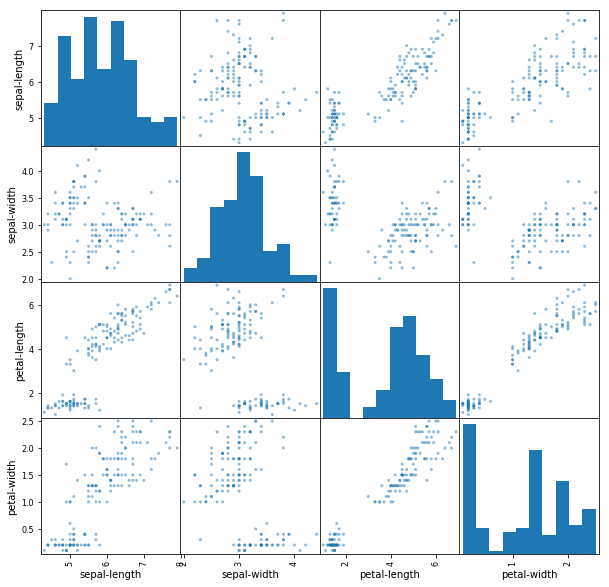

In [15]:
# scatter plot matrix
scatter_matrix(dataset, figsize=(10,10))
plt.show()

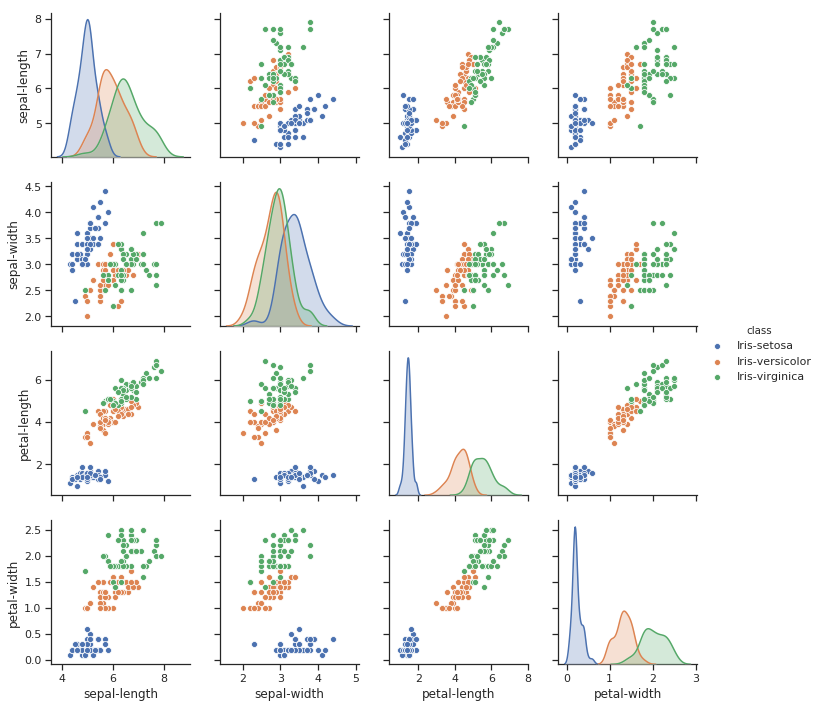

In [16]:
# colored scatter plot matrix
sns.set(style="ticks")

sns.pairplot(dataset, hue="class")

In [45]:
X[:10,:]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [46]:
colors = [ (76/255, 114/255, 176/255), (221/255, 132/255, 82/255), (86/255, 168/255, 104/255) ]
cm_bright = ListedColormap(colors)

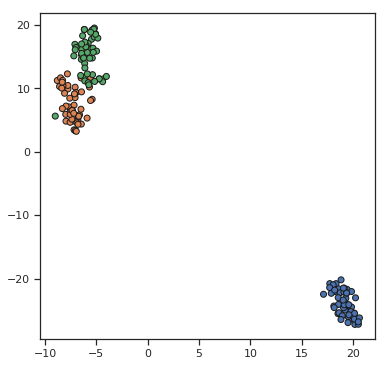

In [47]:
figure = plt.figure(figsize=(6, 6))

X_tsne_embedded = TSNE(n_components=2).fit_transform(X)
X_tsne_embedded.shape, X_tsne_embedded[:10,:]

ax = plt.subplot(1, 1, 1)
ax.scatter(X_tsne_embedded[:,0], X_tsne_embedded[:,1], c=y_plot, cmap=cm_bright, edgecolors='k')
plt.show()

# Train and compare

In [20]:
def create_models():
    return [
        ('LR', LogisticRegression()),
        ('KNN', KNeighborsClassifier()),
        ('CART', DecisionTreeClassifier()),
        ('RF', RandomForestClassifier()),
        ('GB', GradientBoostingClassifier()),
        ('SVM', SVC(probability=True)),
        ('MLP', MLPClassifier(alpha=1, max_iter=1000, hidden_layer_sizes=(100, ))),
        ('NB', GaussianNB()),
    ]

## Check accuracy, precision and recall

### Accuracy

In [49]:
# Test options and evaluation metric
scoring = 'accuracy'

# Spot Check Algorithms
models = create_models()
num_models = len(models)

# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.958333 (0.067185)
KNN: 0.983333 (0.033333)
CART: 0.975000 (0.038188)
RF: 0.966667 (0.040825)
GB: 0.958333 (0.041667)
SVM: 0.991667 (0.025000)
MLP: 0.983333 (0.033333)
NB: 0.975000 (0.038188)


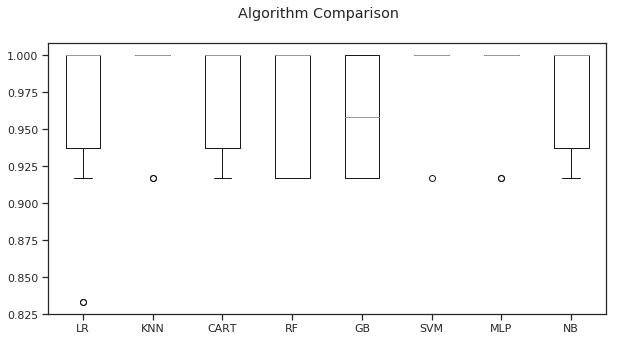

In [50]:
# Compare Algorithms
fig = plt.figure(figsize=(10,5))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Precision and recall for one classifier

In [23]:
# Make predictions on validation dataset
clf = SVC(probability=True) # KNeighborsClassifier()
clf.fit(X_train, y_train)
predictions = clf.predict(X_validation)
print(accuracy_score(y_validation, predictions))
print(confusion_matrix(y_validation, predictions))
print(classification_report(y_validation, predictions))

0.9333333333333333
[[ 7  0  0]
 [ 0 10  2]
 [ 0  0 11]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       1.00      0.83      0.91        12
 Iris-virginica       0.85      1.00      0.92        11

    avg / total       0.94      0.93      0.93        30



In [51]:
predictions1 = clf.predict(X_train)
print(confusion_matrix(y_train, predictions1))

[[43  0  0]
 [ 0 37  1]
 [ 0  0 39]]


In [52]:
clf.predict(np.array([[ 5.1, 3.5, 1.4, 0.2]]))[0]

'Iris-setosa'

## Decision boundaries

Make contour plots for each classifier showing the probabilities of class as colors.

Hmmm, how to do it in multiclass task ?

### Deal with dimensionality

In [25]:
# Take a look at the data again and prep it to classification boundaries visualization
print(X[:10,:]) # 4-dimensional

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]


In [26]:
# Take just petal lengths and widths
X_plot = X[:,2:]
X_train_plot = X_train[:,2:]
X_validation_plot = X_validation[:,2:]
print(X_plot[:10,:])

[[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]
 [1.7 0.4]
 [1.4 0.3]
 [1.5 0.2]
 [1.4 0.2]
 [1.5 0.1]]


In [27]:
def proba2color(proba):
    top2idxs = np.argpartition(proba, 2)[-2:]
    top2 = proba[top2idxs]
    mass_center = np.dot(top2, top2idxs) / np.sum(top2)
    return mass_center

In [28]:
proba2color(np.array([10, 50, 40]))

1.4444444444444444

### Actually plot

In [29]:
# Prepare mesh for contour plots
h = .02  # step size in the mesh

x_min, x_max = X_plot[:, 0].min() - .5, X_plot[:, 0].max() + .5
y_min, y_max = X_plot[:, 1].min() - .5, X_plot[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

In [30]:
def format_ax(ax, title, xx, yy):
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    # ax.set_xticks(())
    # ax.set_yticks(())
    ax.set_title(title)

In [31]:
def plot_pts(ax):
    # Plot the training points
    ax.scatter(X_train_plot[:, 0], X_train_plot[:, 1], c=y_train_plot, cmap=cm_bright, edgecolors='k')

    # and testing points
    ax.scatter(X_validation_plot[:, 0], X_validation_plot[:, 1], c=y_validation_plot, cmap=cm_bright, alpha=0.6, edgecolors='k')


In [32]:
# X_scaled = StandardScaler().fit_transform(X)
# X_scaled[:10,:]

In [33]:
X_train_sliced = X_train[:,:]
X_validation_sliced = X_validation[:,:]

LR
0.8
0.966667 (0.040825)
KNN
0.9
0.983333 (0.033333)
CART
0.8666666666666667
0.966667 (0.040825)
RF
0.9
0.958333 (0.041667)
GB
0.9
0.958333 (0.041667)
SVM
0.9333333333333333
0.991667 (0.025000)
MLP
0.9666666666666667
0.975000 (0.038188)
NB
0.8333333333333334
0.975000 (0.053359)


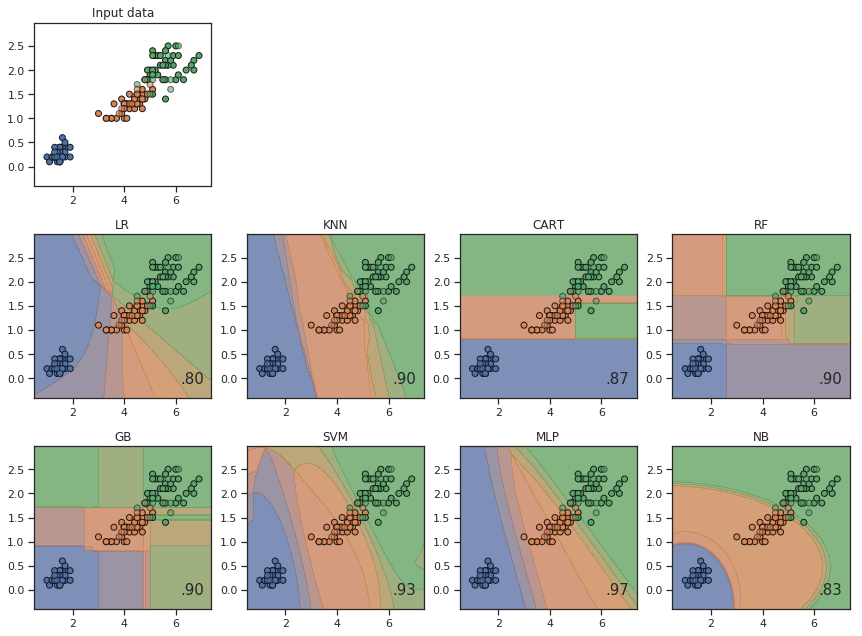

In [34]:
# Prepare for visuals
figure = plt.figure(figsize=(12, 9))

# cm = plt.cm.RdBu
cm = matplotlib.colors.LinearSegmentedColormap.from_list(
    'like_sns',
    colors,
    N=100
)

ax = plt.subplot(3, 4, 1)

# just plot the dataset first
plot_pts(ax)

format_ax(ax, "Input data", xx, yy)

i = 5
models = create_models()
# iterate over classifiers
for name, model in models[:]:
    print(name)
    model.fit(X_train_sliced, y_train)
    ax = plt.subplot(3, 4, i)
    score = model.score(X_validation_sliced, y_validation)
    print(score)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    # Have to specify the other two features, a cross-section, actually
    # 5.75, 3.25 chosen for sepal length and width because that point is close to all classes
    # 5, 2.8 could be another option
    all_mesh_pts = np.array([ [ 5.75, 3.25, x, y ] for x, y in np.c_[xx.ravel(), yy.ravel()] ])
    proba = model.predict_proba(all_mesh_pts)
    Z = np.array([ proba2color(ps) for ps in proba ])
    
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train_sliced, y_train, cv=kfold, scoring=scoring)
    msg = "%f (%f)" % (cv_results.mean(), cv_results.std())
    print(msg)
    
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

    plot_pts(ax)

    format_ax(ax, name, xx, yy)
    ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'), size=15, horizontalalignment='right')
    
    i += 1

plt.tight_layout()
plt.show()